In [46]:
import torch
import torch.nn.functional as F
from helper import *
import matplotlib.pyplot as plt # for making figures

In [2]:
words = read_words('names.txt')
stoi, itos = get_mapping(words)

In [8]:
train_split, val_split = 0.8, 0.1

block_size = 3

X, Y = build_dataset(words, stoi, block_size=block_size)
X, Y = torch.tensor(X), torch.tensor(Y)


n = len(X)
n1 = round(n * train_split)
n2 = round(n * val_split)


X_train, Y_train = X[:n1], Y[:n1]
X_val, Y_val = X[n1:n1+n2], Y[n1:n1+n2]
X_test, Y_test = X[n1+n2:], Y[n1+n2:]

In [97]:
nchars = len(stoi.keys())
emb_dim = 100
hidden_dim = 100

C = torch.randn(nchars, emb_dim) * 0.1

W1 = torch.randn(emb_dim * block_size, hidden_dim) * 0.1
b1 = torch.zeros(hidden_dim)
W2 = torch.randn(hidden_dim, nchars) * 0.1
b2 = torch.zeros(nchars)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [102]:
iterations = 10000
lr = 0.1
reg  = 0.01
batch_size = 64


stepi = []
lossi = []

for k in range(iterations):
    for p in parameters:
        p.grad = None

    idx = torch.randint(0, X_train.shape[0], (batch_size,))
    emb = C[X_train[idx]]

    h = torch.tanh(emb.view(-1, emb_dim * block_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[idx]) + reg*(torch.mean(W1 ** 2) + torch.mean(W2 ** 2))

    loss.backward()

    for p in parameters:
        p.data -= lr * p.grad
    stepi.append(k)
    lossi.append(loss.item())

    pred = logits.argmax(dim = 1)
    acc = (pred == Y_train[idx]).float().mean().data
    print(f"iteration {k} loss {loss.data}, acc {acc * 100}")

iteration 0 loss 2.2059473991394043, acc 34.375
iteration 1 loss 2.332033395767212, acc 34.375
iteration 2 loss 2.1032347679138184, acc 37.5
iteration 3 loss 2.139056444168091, acc 40.625
iteration 4 loss 2.1015448570251465, acc 34.375
iteration 5 loss 2.127878189086914, acc 35.9375
iteration 6 loss 2.133998394012451, acc 32.8125
iteration 7 loss 1.970607876777649, acc 35.9375
iteration 8 loss 2.020493268966675, acc 39.0625
iteration 9 loss 2.3560292720794678, acc 29.6875
iteration 10 loss 1.989906668663025, acc 37.5
iteration 11 loss 2.175213098526001, acc 29.6875
iteration 12 loss 2.076118230819702, acc 37.5
iteration 13 loss 2.291743040084839, acc 29.6875
iteration 14 loss 2.1294164657592773, acc 26.5625
iteration 15 loss 2.130930185317993, acc 32.8125
iteration 16 loss 2.106330394744873, acc 39.0625
iteration 17 loss 2.508615016937256, acc 23.4375
iteration 18 loss 2.1418418884277344, acc 29.6875
iteration 19 loss 1.9826781749725342, acc 37.5
iteration 20 loss 1.995599627494812, ac

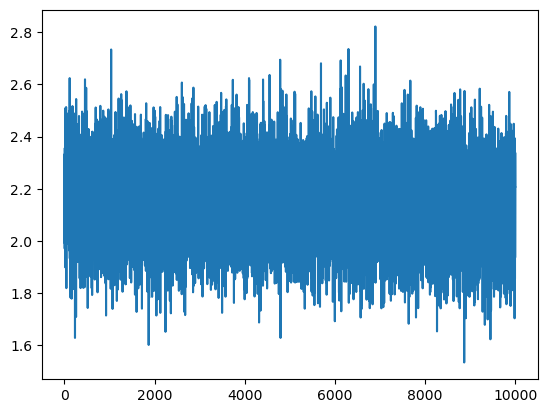

In [103]:
plt.plot(stepi, lossi)
#print(len(stepi))
#print(len(lossi))

In [104]:
with torch.no_grad():
    emb = C[X_val]
    h = torch.tanh(emb.view(-1, emb_dim * block_size) @ W1 + b1)
    logits = h @ W2 + b2
    
    pred = logits.argmax(dim = 1)
    loss = F.cross_entropy(logits, Y_val) + reg*(torch.mean(W1 ** 2) + torch.mean(W2 ** 2))
    acc = (pred == Y_val).float().mean().data
    print(f"loss {loss.data}, acc {acc * 100}")

loss 2.375671148300171, acc 28.498796463012695


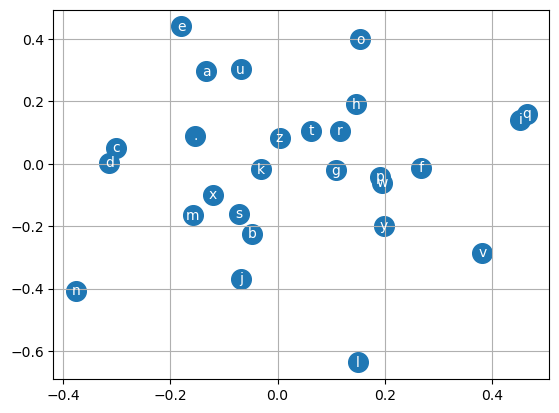

In [105]:
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [106]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))


celbe.
mogh.
makion.
kayda.
malimitta.
nollyan.
kaida.
samiyah.
jaleiggot.
shi.
zamilah.
jazired.
gen.
emilysshey.
nivin.
nyra.
brithiniten.
tallas.
kashra.
aneil.
